With the advent of online shopping and streaming sites, recommender system has become a crucial part of business. Everytime, you look for a product in Amazon, a list of suggestions appear based on past history of the user. Netflix gives similar experience with their shows. In fact for a 10% improved accuracy in their recommender system, they awarded the winning team of an open online contest with 1 million dollar.  

Recommender Systems are of two types - Content based and Colloborative filtering. Colloborative filtering method can be further classified into - memory based and model based. Content based method relies on the features of the product to suggest products with similar features. On the other hand, collaborative filtering relies on user ratings and preferances. For eg., to recommend a product to user A, the system will search for the users similar to  A. If it finds another user B similar to A, it will search for the preferances of B, and based on that, it will suggest the item to A. 

The memory based techniques only look for the past preferences of the users and employs nearest neighbours search. These systems are static. However, model based techniques employs machine learning algorithms to make new predictions. 

We have used _MovieLens Latest Dataset_ developed by GroupLens team. It contains 100000 ratings, and 3600 tag applications applied to 9,000 movies by 600 users. The dataset folder contains separate csv files, and we have loaded _movies.csv_ and _ratings.csv_ into our system since they are relavant for our purpose. The first file contains _movieId, title, genres_ and the second file contains _userId, movieId, rating, timestamp_. In attempt for EDA, we have merged the two files into a single dataset. The relavant features for training our models are: _userId, movieId, rating_. 

For training the dataset, we have used __SURPRISE__ library that is built specially for recommender system. Singular Vector Decomposition (SVD), K-Nearest Neighbour(KNN), and Non-Negative Matrix Factorization (NMF) are used to train the models and RMSE and MAE scores are used as metrics for evaluation. 

The final report is linked in the repository.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
movies = pd.read_csv('movies.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv('ratings.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
dataset = pd.merge(ratings, movies, on='movieId')

In [8]:
#for our purpose, 'timestamp' and 'genres' are unnecessary features
dataset = dataset.drop(['timestamp', 'genres'], axis=1)

In [9]:
dataset.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [10]:
dataset.shape

(100836, 4)

In [11]:
#9724 movies
(len(dataset['movieId'].unique()))

9724

In [12]:
#610 users
len(dataset['userId'].unique())

610

In [13]:
#there's no null value in the dataset
dataset.isnull().sum().max()

0

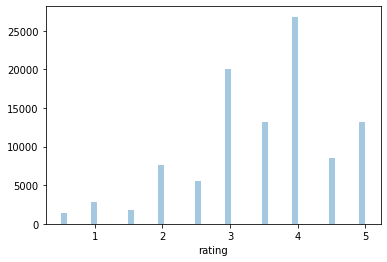

In [14]:
sns.distplot(dataset['rating'], kde=False)

In [15]:
#Top rated movies
dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [16]:
#Highest number of ratings 
dataset.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [17]:
rating_df = pd.DataFrame(dataset.groupby('title')['rating'].mean())

In [18]:
rating_df['count'] = pd.DataFrame(dataset.groupby('title')['rating'].count())

In [19]:
#rating and number of ratings
rating_df.sort_values(by='count', ascending=False).head()

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [20]:
rating_df = rating_df.rename(columns={'rating':'avg rating'})

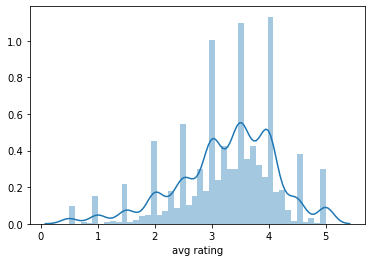

In [21]:
sns.distplot(rating_df['avg rating'])

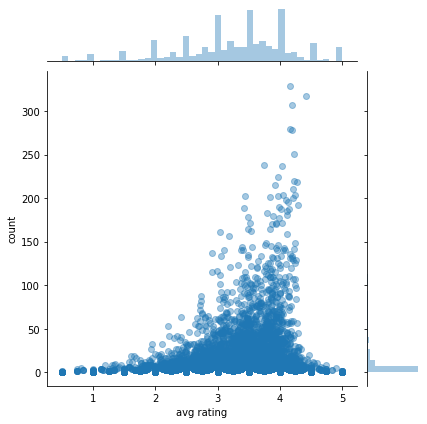

In [22]:
sns.jointplot(x='avg rating', y='count', data=rating_df, alpha=0.4)

In [40]:
from surprise import Reader, Dataset, SVD, NMF, KNNWithMeans
from surprise.model_selection import train_test_split, cross_validate

In [59]:
reader = Reader(rating_scale = (0.5, 5.0))
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader)

### SVD

In [60]:
model = SVD()
result = pd.DataFrame(cross_validate(model, data, cv=10))
mean = [result['test_rmse'].mean(), result['test_mae'].mean(),
                   result['fit_time'].mean(), result['test_time'].mean()]
result.loc['mean'] = mean
result

### NMF

In [91]:
model = NMF()
result = pd.DataFrame(cross_validate(model, data, cv=10))
mean = [result['test_rmse'].mean(), result['test_mae'].mean(),
                   result['fit_time'].mean(), result['test_time'].mean()]
result.loc['mean'] = mean
result

,test_rmse,test_mae,fit_time,test_time
0,0.932221,0.710025,6.553277,0.047907
1,0.915246,0.707543,6.749444,0.047873
2,0.905937,0.694096,6.533822,0.051376
3,0.908721,0.697634,6.902573,0.047873
4,0.915859,0.702693,7.645181,0.090757
5,0.917233,0.701392,7.523734,0.114695
6,0.914380,0.696156,7.565991,0.047174
7,0.916367,0.699780,6.725133,0.053857
8,0.913253,0.699146,7.012540,0.047872
9,0.907883,0.698607,6.944695,0.051862


### KNN with Means

In [92]:
model = KNNWithMeans()
result = pd.DataFrame(cross_validate(model, data, cv=10))
mean = [result['test_rmse'].mean(), result['test_mae'].mean(),
                   result['fit_time'].mean(), result['test_time'].mean()]
result.loc['mean'] = mean
result

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,test_mae,fit_time,test_time
0,0.894478,0.684435,0.276762,0.881572
1,0.888444,0.679291,0.292218,0.864151
2,0.895041,0.682373,0.289765,0.878035
3,0.880857,0.672711,0.291220,0.871371
4,0.885212,0.679630,0.306819,0.895131
5,0.894519,0.682580,0.292217,0.957695
6,0.903276,0.684843,0.324131,0.980885
7,0.891081,0.682023,0.327123,1.008442
8,0.893534,0.682357,0.313164,0.938996
9,0.895657,0.682817,0.294438,0.903685
